In [ ]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
import platform

if platform.system() == 'Darwin':         # mac
    plt.rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)



In [ ]:
# 시도별 전출입 인구수.xlsx 파일을 읽어 df에 저장한 후
# Nan 데이터 처리
# 서울특별시에서 타시로 이동한 인구의 자료만 df_seoul로 추출
# 인덱스명을 전입지 컬럼으로 설정
# 경기도, 충청남도, 강원도, 전라남도의 자료 중 1997년부터 2017년 자료만 추출
# df_1에 저장
# 년도를 인덱스로 바꾸어서 df_t에 저장



In [60]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
df.fillna(method='ffill',inplace=True)
mask = (df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul = df[mask]

df_seoul = df_seoul.rename({'전입지별':'전입지'},axis=1)
df_seoul = df_seoul.set_index('전입지')
df_seoul = df_seoul.drop('전출지별',axis=1)

col_years = list(map(str,range(1997,2018)))
df_1 = df_seoul.loc[['경상북도','충청남도','강원도','전라남도'],col_years]

df_t = df_1.T

df_t

전입지,경상북도,충청남도,강원도,전라남도
1997,15271,27395,25178,22773
1998,16103,25928,25840,26176
1999,16604,26726,25741,29161
2000,14576,23083,22832,22969
2001,14303,22056,22941,22457
2002,13762,21155,21582,18179
2003,13938,24942,21696,20432
2004,13414,30246,22071,16529
2005,14550,26012,20483,17049
2006,15285,25986,21969,17329


In [61]:
# 면적 그래프 : 인덱스가 숫자이어야 함
df_t.index = df_t.index.map(int)

In [62]:
df_t.index

Int64Index([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

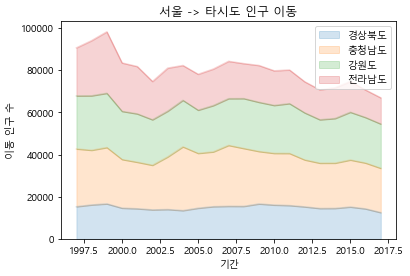

In [63]:
df_t.plot(kind='area',stacked=True,alpha=0.2)

plt.title('서울 -> 타시도 인구 이동',size=12)
plt.ylabel('이동 인구 수')
plt.xlabel('기간')
plt.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title()

plt.plot()
plt.title()

df.plot()

ax = df.plot()
ax.set_title

In [64]:
df_1

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
경상북도,15271,16103,16604,14576,14303,13762,13938,13414,14550,15285,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
충청남도,27395,25928,26726,23083,22056,21155,24942,30246,26012,25986,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
강원도,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,22773,26176,29161,22969,22457,18179,20432,16529,17049,17329,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [65]:
# 막대그래프
df_t = df_1.T
df_t.index = df_t.index.map(int)

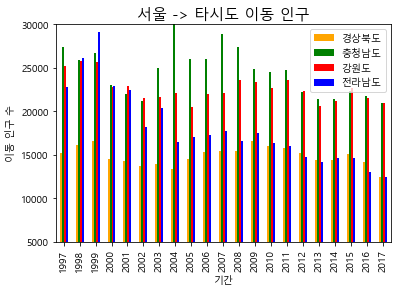

In [68]:
df_t.plot(kind='bar',color=['orange','green','red','blue'])
plt.title('서울 -> 타시도 이동 인구',size=15)
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.ylim(5000,30000)
plt.legend(loc='best')
plt.show()

In [71]:
df_2 = df_seoul.loc[['경상북도','충청남도','강원도','전라남도'],col_years]
df_2

# 합계 컬럼 추가 (1997부터 2017년 까지의 인구 이동수의 합계)
df_2['합계'] = df_2.sum(axis=1)
df_2

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,,,,,,,,,,,,,
경상북도,15271,16103,16604,14576,14303,13762,13938,13414,14550,15285,...,16569,16042,15818,15191,14420,14456,15113,14236,12464,312988.0
충청남도,27395,25928,26726,23083,22056,21155,24942,30246,26012,25986,...,24889,24522,24723,22269,21486,21473,22299,21741,21020,514307.0
강원도,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,...,23331,22736,23624,22332,20601,21173,22659,21590,21016,475240.0
전라남도,22773,26176,29161,22969,22457,18179,20432,16529,17049,17329,...,17468,16429,15974,14765,14187,14591,14598,13065,12426,380875.0


In [73]:
df_total = df_2[['합계']].sort_values(by='합계',ascending=True)
df_total

,합계
전입지,
경상북도,312988.0
전라남도,380875.0
강원도,475240.0
충청남도,514307.0


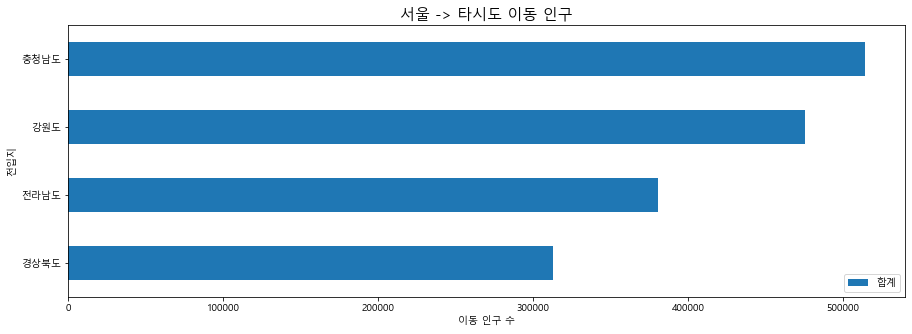

In [78]:
df_total.plot(kind='barh',figsize=(15,5))

plt.title('서울 -> 타시도 이동 인구',size=15)
plt.xlabel('이동 인구 수')
plt.ylabel('전입지')

plt.show()

In [91]:
# twin그래프 x축은 동일 y축 범위 서로다름
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')

# 북한의 수력, 화력 발전량의 추이를 분석
df = df.loc[5:]
df    # 전력량 컬럼 제거
df = df.drop('전력량 (억㎾h)',axis=1)
df
# 발전 전력별 컬럼을 인덱스로
df.set_index('발전 전력별',inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [92]:
df_t = df.T
df_t

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [93]:
# 합계를 총 발전량으로 변경
df_t = df_t.rename(columns={'합계':'총발전량'})
df_t

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [101]:
# 증감률 : (총발전량 /전년도 총발전량 -1) * 100
# ['총발전량-1년']
df_t['총발전량']
df_t['총발전량'].shift(1)
df_t['전년도 발전량'] = df_t['총발전량'].shift(1)
df_t['증감률'] = ((df_t['총발전량']/df_t['전년도 발전량']-1)*100)


발전 전력별,총발전량,수력,화력,원자력,전년도 발전량,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


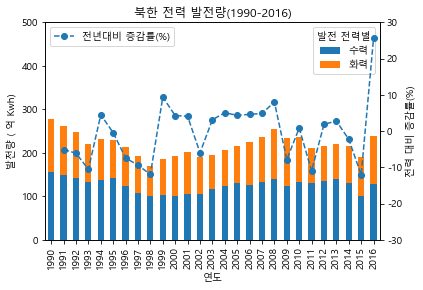

In [107]:
# 2개축 그래프 그리기 : 수력,화력 -> 막대, 증감률 -> 선그래프

ax1 = df_t[['수력','화력']].plot(kind='bar',stacked=True)
ax2 = ax1.twinx()
ax2.plot(df_t.index,df_t.증감률,ls='--',marker='o',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-30,30)

ax1.set_xlabel('연도')
ax1.set_ylabel('발전량 ( 억 Kwh)')
ax2.set_ylabel('전력 대비 증감률(%)')

plt.title('북한 전력 발전량(1990-2016)')
plt.legend(loc='best')
plt.show()





In [115]:
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')

df = df.loc[:4]

df = df.drop('전력량 (억㎾h)',axis=1)


df.set_index('발전 전력별',inplace=True)

df_t = df.T

df_t = df_t.rename(columns={'합계':'총발전량'})
df_t

발전 전력별,총발전량,수력,화력,원자력,신재생
1990,1077,64,484,529,-
1991,1186,51,573,563,-
1992,1310,49,696,565,-
1993,1444,60,803,581,-
1994,1650,41,1022,587,-
1995,1847,55,1122,670,-
1996,2055,52,1264,739,-
1997,2244,54,1420,771,-
1998,2153,61,1195,897,-
1999,2393,61,1302,1031,-


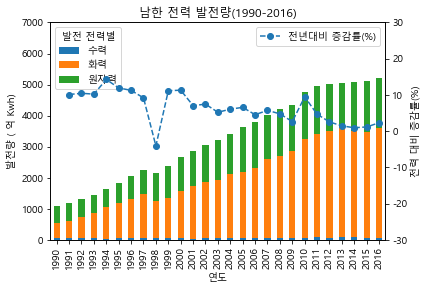

In [118]:
df_t['전년도 발전량'] = df_t['총발전량'].shift(1)
df_t['증감률'] = ((df_t['총발전량']/df_t['전년도 발전량']-1)*100)

ax1 = df_t[['수력','화력','원자력']].plot(kind='bar',stacked=True)
ax2 = ax1.twinx()
ax2.plot(df_t.index,df_t.증감률,ls='--',marker='o',label='전년대비 증감률(%)')

ax1.set_ylim(0,7000)
ax2.set_ylim(-30,30)

ax1.set_xlabel('연도')
ax1.set_ylabel('발전량 ( 억 Kwh)')
ax2.set_ylabel('전력 대비 증감률(%)')

plt.title('남한 전력 발전량(1990-2016)')
plt.legend(loc='best')
plt.show()
